# Codeclause Internship- Data Science Intern
# By- Aditya Rajendra Karle

# Task-2
# Market Basket Analysis in Python using Apriori Algorithm

### Importing Required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Understanding the data

In [8]:
pwd

'C:\\Users\\Windows 10\\OneDrive\\Desktop\\Codeclause'

In [19]:

# Try reading the CSV file with 'latin1' encoding
df = pd.read_csv("Online_Retail.csv", encoding='latin1',parse_dates=['InvoiceDate'])


In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
df.shape

(541909, 8)

In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [24]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


### Data Cleaning

In [25]:
#checking data that the OnvoiceNo column is in the form of a string.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [27]:
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


###  Only need to count successful transactions and we'll delete data starting with C because it represents canceled transactions

In [30]:
#deleting cancelled transactions
df = df[~df['InvoiceNo'].str.contains('C')]

In [32]:
df.shape

(532621, 8)

In [39]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,134697,25.289465
1,Description,1454,0.272990
2,InvoiceNo,0,0.000000
3,StockCode,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Country,0,0.000000


We can see that there are missing values present in column CustomerID anf Description. So to overcome this problem we can just delete those mising values becuase we have data in large size.

In [40]:
df = df.dropna(subset = ['CustomerID', 'Description'])

In [41]:
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


In [42]:
#Remove spaces at the beginning or end of sentences
df['Description'] = df['Description'].str.strip()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\2172621552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].str.strip()


In [43]:
df.shape

(397924, 8)

In [44]:
df.info()
df['CustomerID'] = df['CustomerID'].astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\2979378011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype('int')


In [45]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


# EDA(Exploratory Data Analysis)

### 1.What customers do customers buy the most?


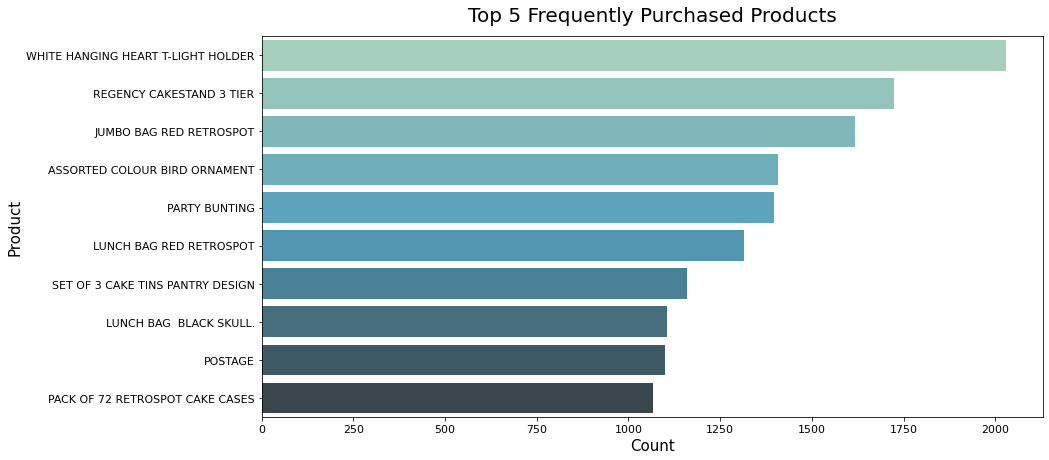

In [46]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['Description'], 
                   order = df["Description"].value_counts().iloc[:10].index, 
                   palette = "GnBu_d")
ax.set_title("Top 5 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Count", size = 15)
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

The white hanging heart t-light holder is the product most often purchased by customers.

### 2.How many orders (Monthly)?

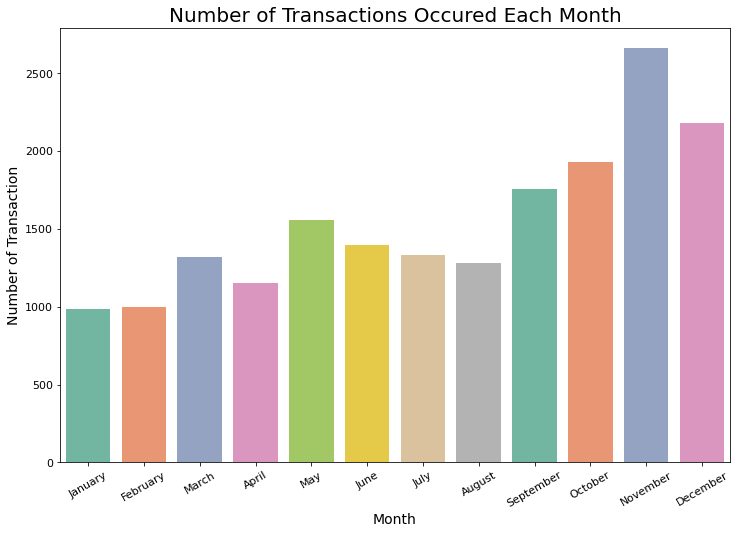

In [47]:
order_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_month.reset_index(), palette = "Set2")
ax.set_title('Number of Transactions Occured Each Month', size = 20)
ax.set_xlabel('Month', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'], rotation = 30)
plt.show()

Most transactions were in November as it was near the holidays. Also, it is likely that many people are buying gifts for Christmas in November.

### 3.How many orders (per day)? 

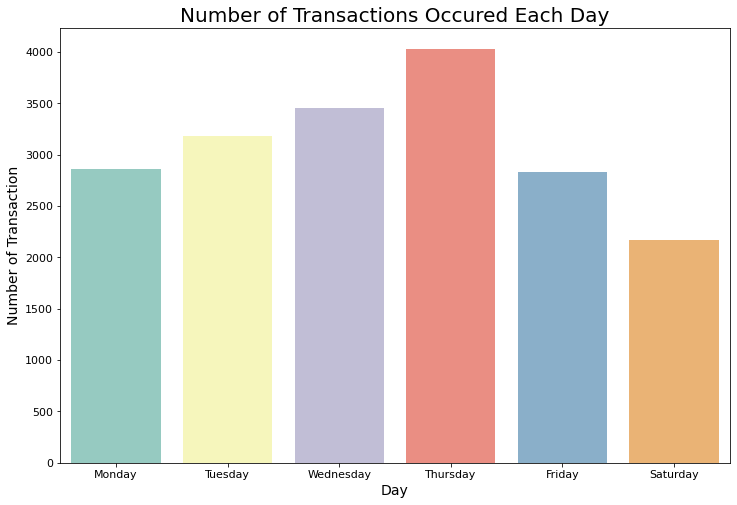

In [48]:
order_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(), palette = "Set3")
ax.set_title('Number of Transactions Occured Each Day', size = 20)
ax.set_xlabel('Day', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

Thursday is the busiest day and Saturday is the least busy day.

### 4.How many orders (per hour)?

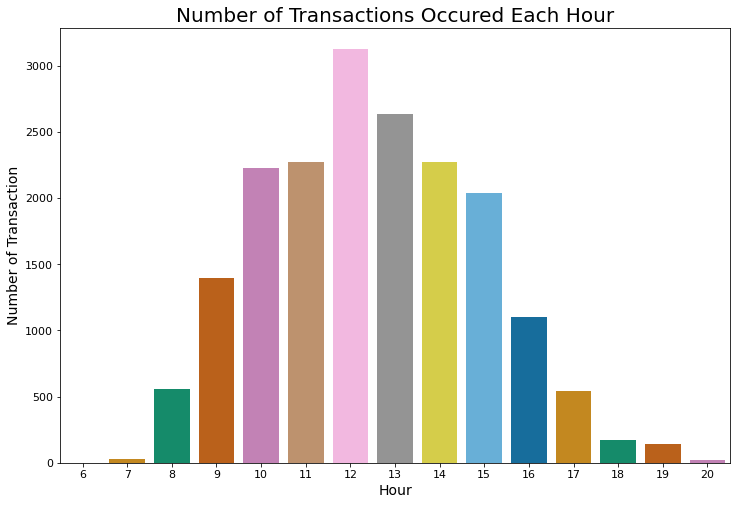

In [49]:
order_hour = df.groupby(df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_hour.reset_index(), palette = "colorblind")
ax.set_title('Number of Transactions Occured Each Hour', size = 20)
ax.set_xlabel('Hour', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()

Most orders are between 12 AM and 1PM. There is a possibility because at that time people take a break from work and can order goods at online retail.

### 5.Who are the 5 customers who spend the most money on Online Retail?

In [50]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
df.head()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\2017916772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity']*df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:
price_cust = pd.pivot_table(df, index='CustomerID', values='TotalPrice', aggfunc=np.sum)
print('The following are 5 customers who spend the most money on Online Retail:')
price_cust.sort_values('TotalPrice', ascending=False)[:5]

The following are 5 customers who spend the most money on Online Retail:


,TotalPrice
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06


Customer with ID 14646 is the customer who spent the most money in online retail, which is $280,206.02

### 6.Who are the five most frequent customer shopping in Online Retail? 

In [52]:
order_cust = pd.pivot_table(df, index='CustomerID', values='InvoiceNo', aggfunc=pd.Series.nunique)
print('The following are the 5 customers who most frequently shop at Online Retail:')
order_cust.sort_values('InvoiceNo', ascending=False)[:5]

The following are the 5 customers who most frequently shop at Online Retail:


,InvoiceNo
CustomerID,
12748,210
14911,201
17841,124
13089,97
14606,93


Customer with ID 12748 is the most frequent customer shopping in online retail, with 210 transactions.
Customers with ID 14911 are customers who frequently shop and spend a lot of money at online retail.

### Time Cohorts 

First of all, we will retrieve the InvoiceMonth data.

In [54]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\936549601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)


In [55]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


Next, we will create a CohortMonth, which is the time when customers first shop.

In [56]:
group = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = group.transform('min')
df

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\68856744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CohortMonth'] = group.transform('min')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01


In [57]:
def date(data, column):
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [58]:
invoice_year, invoice_month, _ = date(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = date(df, 'CohortMonth')

urthermore, the month difference will be calculated between the first customer shopping at the retail store and the invoice time.
Difference in years and months

In [59]:
diff_year = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

The IndexTime column describes the month difference between the first purchase and the purchase on InvoiceMonth. An addition is made by 1 so that the first month is counted as 1, not 0.

In [60]:
df['IndexTime'] = diff_year*12 + diff_month + 1
df

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_1780\1963870804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IndexTime'] = diff_year*12 + diff_month + 1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,5


In [61]:
count_cohort_time = df.groupby(['CohortMonth', 'IndexTime'])['CustomerID'].apply(pd.Series.nunique)
count_cohort_time = count_cohort_time.reset_index()
cohort_time_table = count_cohort_time.pivot(index='CohortMonth', columns='IndexTime', values='CustomerID')
cohort_time_table

IndexTime,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Customer Retention Rate
Customer retention is a very useful metric to understand how many of all the customers are still active. Customer retention rate designates the percentage of customers the company has retained over a given time period. Retention rate is a reverse side of churn rate, which shows the percentage of customers a company has lost over a specific period.

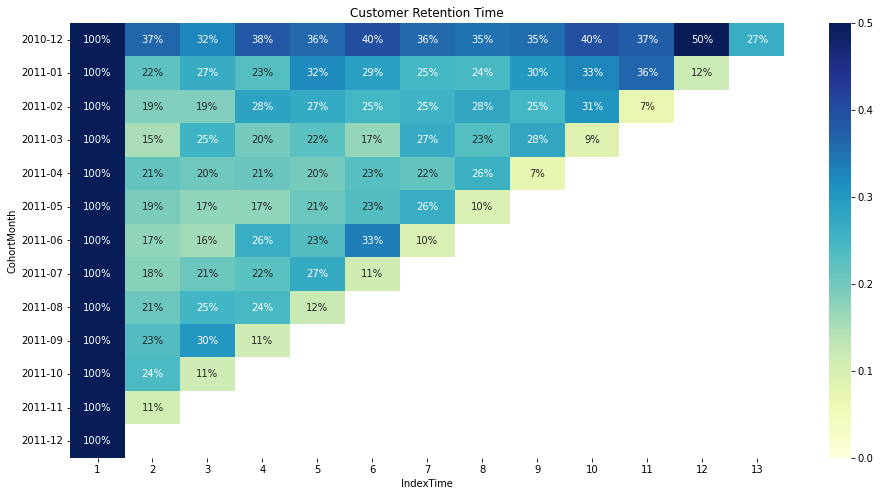

In [62]:
cohort_size = cohort_time_table.iloc[:,0]
#Divide all values in the cohort_time_table by cohort_size
retention = cohort_time_table.divide(cohort_size, axis = 0)
retention.index = retention.index.strftime('%Y-%m')
plt.figure(figsize= (16,8))
ax = sns.heatmap(data = retention, annot = True, annot_kws={"size":10}, vmin = 0.0, vmax = 0.5, fmt = '.0%', cmap = 'YlGnBu')
plt.title('Customer Retention Time')
plt.show()

On average, the number of customers that online retail has successfully retained is less than 50%. Online retail should evaluate the marketing methods it does. Or online retail can provide special points for each customer who transact and can be exchanged for prizes.

In [64]:
print('Min: {}\nMax: {}'.format(min(df['InvoiceDate']), max(df['InvoiceDate'])))

Min: 2010-12-01 08:26:00
Max: 2011-12-09 12:50:00


In [65]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth,IndexTime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,1


We assume that we are analyzing on analysis_date. The analysis date is 1 day from the last date on InvoiceDate.

In [66]:
analysis_date = max(df['InvoiceDate']) + dt.timedelta(days= 1)
print((analysis_date).date())

2011-12-10


In [67]:
rfm_cust = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})
rfm_cust.rename(columns= {'InvoiceDate':'Recency',
                         'InvoiceNo':'Frequency',
                         'TotalPrice':'Monetary'}, inplace = True)
rfm_cust

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


### RFM quartile
We will divide the RFM into 4 parts. 

In [68]:
#1 is the best and 4 is the worst
r_labels = range(1,5) #The longer the customer last purchase, the worse it is
f_labels = range(4,0,-1) #The more purchases the customer makes, the better it is
m_labels = range(4,0,-1) #The more money the customer spends, the better it is

r_quartiles = pd.qcut(rfm_cust['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(rfm_cust['Frequency'], q=4, labels=f_labels)
m_quartiles = pd.qcut(rfm_cust['Monetary'], q=4, labels=m_labels)

rfm_cust = rfm_cust.assign(R = r_quartiles.values, F = f_quartiles.values, M = m_quartiles.values)

rfm_cust

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,326,1,77183.60,4,4,1
12347,2,182,4310.00,1,1,1
12348,75,31,1797.24,3,3,1
12349,19,73,1757.55,2,2,1
12350,310,17,334.40,4,4,3
...,...,...,...,...,...,...
18280,278,10,180.60,4,4,4
18281,181,7,80.82,4,4,4
18282,8,12,178.05,1,4,4


In [69]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
rfm_cust['RFM_Segment'] = rfm_cust.apply(join_rfm, axis=1)
rfm_cust['RFM_Score'] = rfm_cust[['R', 'F', 'M']].sum(axis=1)
rfm_cust.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,326,1,77183.60,4,4,1,4.04.01.0,9
12347,2,182,4310.00,1,1,1,1.01.01.0,3
12348,75,31,1797.24,3,3,1,3.03.01.0,7
12349,19,73,1757.55,2,2,1,2.02.01.0,5
12350,310,17,334.40,4,4,3,4.04.03.0,11


In [70]:
rfm_cust.groupby('RFM_Segment').size().sort_values(ascending=False)

RFM_Segment
1.01.01.0    447
4.04.04.0    384
2.01.01.0    217
4.03.03.0    206
3.04.04.0    179
            ... 
2.04.01.0      7
1.04.01.0      6
4.03.01.0      5
4.01.03.0      4
1.01.04.0      3
Length: 61, dtype: int64

As we can see, the lowest and the highest rated RFM segments are among the largest ones

Summary metrics for each RFM Score

In [71]:
rfm_cust.groupby('Loyalty_Level').agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetary':['mean','count']}).round(1)

KeyError: 'Loyalty_Level'

### Key k-means assumptions
1.Symmetric distribution of variables (not skewed)
2.Variables with same average values
3.Variables with same variance 

In [72]:
def rfm_dist(column):
    r_skew = rfm_cust[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_cust[column], color = 'tomato', kde_kws={"color": "k"})
    plt.title('{} Distribution'.format(column))

    plt.show()
    print('Skewness value of data {}: {}'.format(column, r_skew))

C:\Users\Windows 10\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


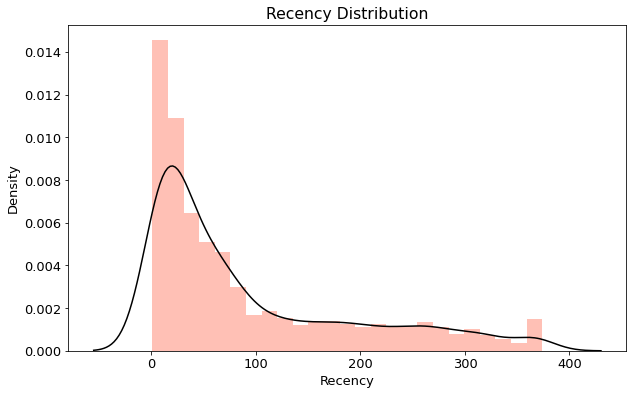

Skewness value of data Recency: 1.2463568823921845


In [73]:
rfm_dist('Recency')

C:\Users\Windows 10\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


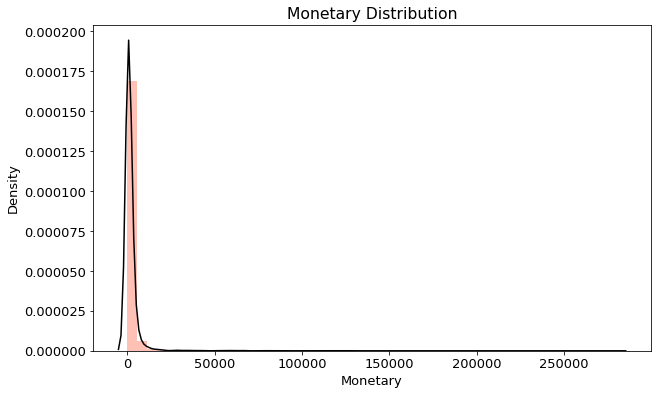

Skewness value of data Monetary: 19.326985305561823


In [74]:
rfm_dist('Monetary')

C:\Users\Windows 10\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


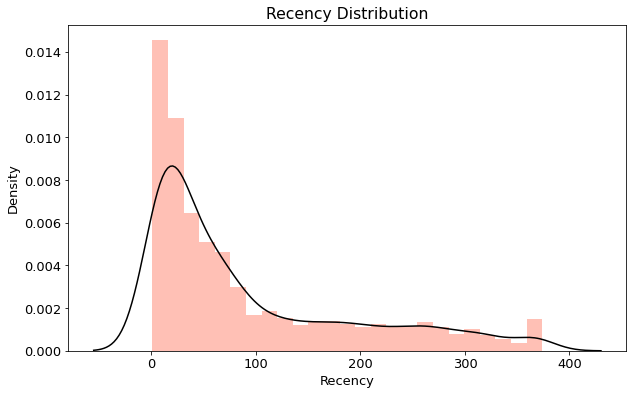

Skewness value of data Recency: 1.2463568823921845


In [75]:
rfm_dist('Recency')

In [76]:
print("The following is the skewness value for Recency, Frequency, and Monetary data:",
      '\nRecency   : {}'.format(rfm_cust['Recency'].skew()),
      '\nFrequency : {}'.format(rfm_cust['Frequency'].skew()),
      '\nMonetary  : {}'.format(rfm_cust['Monetary'].skew()))

The following is the skewness value for Recency, Frequency, and Monetary data: 
Recency   : 1.2463568823921845 
Frequency : 18.106242903118684 
Monetary  : 19.326985305561823


As a general rule of thumb:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

From the general rule of thumb, it can be concluded that data Recency, Frequency, and Monetary are highly positive skew. So, the data must be transformed (Data Transformation) to make it into a normal distribution.

In [77]:
rfm_norm = rfm_cust[['Recency','Frequency','Monetary']]
rfm_norm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,91.708689,2053.793018
std,100.009747,228.792852,8988.248381
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,307.245000
50%,51.000000,41.000000,674.450000
75%,142.000000,100.000000,1661.640000
max,374.000000,7847.000000,280206.020000


In [78]:
power = PowerTransformer().fit(rfm_norm)
rfm_transform =power.transform(rfm_norm)

#Standard Scaler to Scale the data
scaler = StandardScaler().fit(rfm_transform)
rfm_transform = scaler.transform(rfm_transform)

rfm_transform =pd.DataFrame(rfm_transform, index=rfm_norm.index, columns=rfm_norm.columns)
print('These are the mean value after data transformation:')
rfm_transform.describe()

These are the mean value after data transformation:


,Recency,Frequency,Monetary
count,4.339000e+03,4.339000e+03,4.339000e+03
mean,-6.562444e-17,-3.149768e-17,-1.358673e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-2.023615e+00,-2.420116e+00,-6.771115e+00
25%,-7.262454e-01,-6.778752e-01,-6.640781e-01
50%,-7.919785e-04,-1.754355e-03,-1.423703e-02
75%,8.380272e-01,7.009493e-01,6.862765e-01
max,1.755177e+00,4.225204e+00,3.885827e+00


In [79]:
def rfm_dist_transform(column):
    r_skew_transform = rfm_transform[column].skew()

    plt.rcParams['font.size']=13
    plt.figure(figsize=(10,6))
    sns.distplot(rfm_transform[column], color = 'g', kde_kws={"color": "k"})
    plt.title('{} Distribution after Data Transformation'.format(column))

    plt.show()
    print('Skewness value of data {} after data transformation: {}'.format(column, r_skew_transform))

Since the skewness values are between -0.5 to 0.5, or close to 0, it can be assumed that the RFM data has a normal distribution.

We will choose 4 clusters based on the elbow method, because there is no significant decrease in sum of squared distance or SSE after 4 clusters. Based on the silhouette analysis, the silhouette_score that is close to 1 is for the number of clusters 2 and 4.By combining the elbow method and silhouette analysis, the number of clusters 4 is selected.

### Conclusion Market Basket Analysis
From the market basket analysis, it is found that customers who buy PINK REGENCY TEACUP AND SAUCER tend to buy GREEN REGENCY TEACUP AND SAUCER. The three most frequent associations for lift over 6 and confidence above 8 are items related to teacup and saucer. Perhaps we can provide more color variants on the teacup.